In [44]:
import matplotlib.pyplot as plt
%matplotlib inline

1. *Измените функцию calc_logloss так, чтобы нули по возможности не попадали в np.log.

In [45]:
X = np.array([ [   1,    1,  500,    1],
               [   1,    1,  700,    1],
               [   1,    2,  750,    2],
               [   1,    5,  600,    1],
               [   1,    3, 1450,    2],
               [   1,    0,  800,    1],
               [   1,    5, 1500,    3],
               [   1,   10, 2000,    3],
               [   1,    1,  450,    1],
               [   1,    2, 1000,    2]], dtype = np.float64)

y = np.array([0, 0, 1, 0, 1, 0, 1, 0, 1, 1], dtype = np.float64)

In [46]:
def standard_scale(x):
    res = (x - x.mean()) / x.std()
    return res

def calc_logloss(y, y_pred):
    err = - np.mean(y * np.log(y_pred) + (1.0 - y) * np.log(1.0 - y_pred))
    return err

def sigmoid(z):
    res = 1 / (1 + np.exp(-z))
    return res

In [47]:
X_st = X.copy()
X_st[:, 2] = standard_scale(X[:, 2])

In [48]:
y1 = np.array([0.99999, 0])
y_pred1 = np.array([0.99999, 0.1])
calc_logloss(y1, y_pred1)

0.052742822431237645

2. Подберите аргументы функции eval_model для логистической регрессии таким образом, чтобы log loss был минимальным.


In [63]:
X = np.array([ [   1,    1,  500,    1],
               [   1,    1,  700,    1],
               [   1,    2,  750,    2],
               [   1,    5,  600,    1],
               [   1,    3, 1450,    2],
               [   1,    0,  800,    1],
               [   1,    5, 1500,    3],
               [   1,   10, 2000,    3],
               [   1,    1,  450,    1],
               [   1,    2, 1000,    2]], dtype = np.float64)

y = np.array([0, 0, 1, 0, 1, 0, 1, 0, 1, 1], dtype = np.float64)

In [64]:
X_st = X.copy()
X_st[:, 2] = standard_scale(X[:, 2])

In [65]:
def standard_scale(x):
    res = (x - x.mean()) / x.std()
    return res

def calc_logloss(y, y_pred):
    err = - np.mean(y * np.log(y_pred) + (1.0 - y) * np.log(1.0 - y_pred))
    return err

def sigmoid(z):
    res = 1 / (1 + np.exp(-z))
    return res

In [89]:
# Logistic Regression
def eval_model(X, y, iterations, eta=1e-4):
    np.random.seed(42)
    W = np.random.randn(X.shape[1])
    n = X.shape[0]
    
    for i in range(iterations):
        z = np.dot(X, W)
        y_pred = sigmoid(z)
        err = calc_logloss(y, y_pred)
        
        dQ = 1/n * X.T @ (y_pred - y)
        W -= eta * dQ
#         if i % (iterations / 10) == 0:
#             print(i, W, err)
    return W, err

In [71]:
W = eval_model(X_st, y, iterations=500, eta=1e-4)

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
50 [ 0.494784   -0.14564801  0.6475462   1.52014828] 1.1657985749255426
100 [ 0.49290109 -0.15285535  0.64740132  1.51733474] 1.1531112685708473
150 [ 0.49102761 -0.16003088  0.64725118  1.51453281] 1.1405352753305018
200 [ 0.48916364 -0.16717404  0.64709581  1.51174267] 1.1280719326917483
250 [ 0.48730929 -0.17428428  0.64693524  1.50896452] 1.1157225565960736
300 [ 0.48546465 -0.18136107  0.64676951  1.50619853] 1.103488442622439
350 [ 0.48362982 -0.18840385  0.64659868  1.5034449 ] 1.0913708674192037
400 [ 0.48180488 -0.19541206  0.64642281  1.50070383] 1.0793710903721336
450 [ 0.47998993 -0.20238516  0.64624195  1.49797551] 1.0674903554915993


In [92]:
err_ = 10000
for iterations_ in np.arange(100, 10000):
    for eta_ in np.arange(1e-4, 1e-3):
        W, err = eval_model(X_st, y, iterations=iterations_, eta=eta_)
        if err < err_:
            err_ = err
            iterations1 = iterations_
            eta1 = eta_
            W_ = W
print(f'W={W_}, err={err_}, iterations={iterations1}, eta={eta1}')

KeyboardInterrupt: 

In [49]:
from sklearn import datasets
from matplotlib.colors import ListedColormap

# сгеренируем данные с помощью sklearn.datasets
X, y = datasets.make_classification(n_samples=100, n_features=2, n_informative=2,
                                    n_redundant=0, n_classes=2, random_state=1)
# X, y = datasets.make_blobs(centers=2, cluster_std=2.5, random_state=12)
X, y

(array([[ 1.30022717, -0.7856539 ],
        [ 1.44184425, -0.56008554],
        [-0.84792445, -1.36621324],
        [-0.72215015, -1.41129414],
        [-1.27221465,  0.25945106],
        [ 0.78694271,  0.94294879],
        [ 0.81695766, -1.12478707],
        [ 1.6822707 , -0.67596877],
        [-1.07223343, -0.7701513 ],
        [-0.06539297,  1.11257376],
        [-1.33232952,  0.60245671],
        [-0.6963714 ,  0.96382716],
        [ 0.82340614,  0.7561926 ],
        [-1.5155534 , -0.15804853],
        [-0.78971776,  1.70347973],
        [ 0.85887841,  1.04457966],
        [-0.45001335,  0.27345841],
        [ 0.7099324 ,  0.69020919],
        [-0.79095935,  1.60495551],
        [-1.08077536, -1.15530746],
        [-1.5691733 , -0.54054806],
        [-0.52568843,  1.52568161],
        [-1.27406042, -0.1434304 ],
        [ 0.89621114, -1.11509679],
        [-0.85259895, -1.42554982],
        [-0.63262806,  1.2217558 ],
        [-0.86447712, -1.40921978],
        [-0.47819102,  3.174

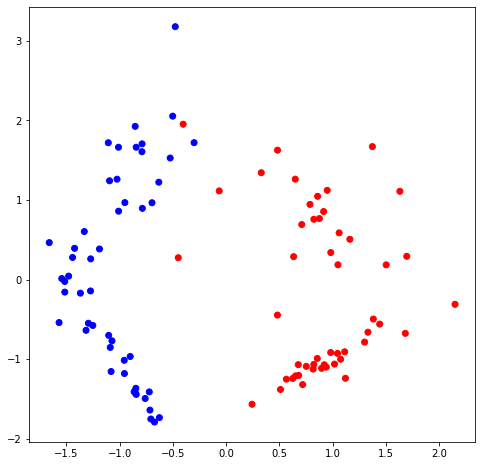

In [50]:
# и изобразим их на графике
colors = ListedColormap(['blue', 'red'])
plt.figure(figsize=(8, 8))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=colors);

Далее разделим выборку на обучающую и тестовую. При реальной работе, если нет специфических требований по сохранению порядка выборки, ее полезно перемешивать, так как данные в ней могут быть каким-либо образом отсортированы. Это может негативно сказаться на процессе обучения.

In [51]:
np.random.permutation(X.shape[0])

array([55, 11, 87, 29, 21, 88, 98, 23,  7, 63, 27, 53, 47, 51, 31, 13, 73,
       70, 65,  9, 60, 94, 32, 93,  2, 86, 25, 92, 67, 18, 58, 81, 89,  1,
        5, 69, 41, 57, 14, 82, 12, 96, 90, 24,  8, 40, 74, 61, 45, 97, 33,
        0, 15,  3, 80,  6, 62, 91, 59, 39, 42, 66, 17, 16, 50, 34, 75, 37,
       38, 79, 64, 43, 19, 77, 85, 20, 28,  4, 95, 78, 56, 22, 84, 26, 72,
       83, 76, 10, 46, 36, 49, 30, 54, 71, 35, 99, 52, 44, 48, 68])

In [52]:
# перемешивание датасета
np.random.seed(12)
shuffle_index = np.random.permutation(X.shape[0])
X_shuffled, y_shuffled = X[shuffle_index], y[shuffle_index]

# разбивка на обучающую и тестовую выборки
train_proportion = 0.7
train_test_cut = int(len(X) * train_proportion)

X_train, X_test, y_train, y_test = \
    X_shuffled[:train_test_cut], \
    X_shuffled[train_test_cut:], \
    y_shuffled[:train_test_cut], \
    y_shuffled[train_test_cut:]
    
print("Размер массива признаков обучающей выборки", X_train.shape)
print("Размер массива признаков тестовой выборки", X_test.shape)
print("Размер массива ответов для обучающей выборки", y_train.shape)
print("Размер массива ответов для тестовой выборки", y_test.shape)

Размер массива признаков обучающей выборки (70, 2)
Размер массива признаков тестовой выборки (30, 2)
Размер массива ответов для обучающей выборки (70,)
Размер массива ответов для тестовой выборки (30,)


In [59]:
# функция потерь log loss с одновременным расчетом градиента.
def log_loss(w, X, y):
    m = X.shape[0]
    # используем функцию сигмоиды, написанную ранее
    A = sigmoid(np.dot(X, w))
        
    # labels 0, 1
#     loss = -1.0 / m * np.sum(y * np.log(A) + (1 - y) * np.log(1 - A))
    
#     labels -1, 1
    temp_y = np.where(y == 1, 1, -1)
    loss = 1.0 / m * np.sum(np.log(1 + np.exp(-temp_y * np.dot(X, w))))

    grad = 1.0 / m * X.T @ (A - y)

    return loss, grad

In [54]:
# градиентный спуск
def optimize(w, X, y, n_iterations, eta):
    # потери будем записывать в список для отображения в виде графика
    losses = []
    
    for i in range(n_iterations):        
        loss, grad = log_loss(w, X, y)
        w = w - eta * grad

        losses.append(loss)
        
    return w, losses

In [55]:
# функция для выполнения предсказаний
def predict(w, X):
    
    m = X.shape[0]
    
    y_predicted = np.zeros(m)

    A = np.squeeze(sigmoid(np.dot(X, w)))

    # За порог отнесения к тому или иному классу примем вероятность 0.5
    for i in range(A.shape[0]):
        if (A[i] > 0.5): 
            y_predicted[i] = 1
        elif (A[i] <= 0.5):
            y_predicted[i] = 0

    return y_predicted

In [60]:
# иницилизируем начальный вектор весов
w0 = np.zeros(X_train.shape[1])

n_iterations = 1000
eta = 0.05

w, losses = optimize(w0, X_train, y_train, n_iterations, eta)

y_predicted_test = predict(w, X_test)
y_predicted_train = predict(w, X_train)

# В качестве меры точности возьмем долю правильных ответов
train_accuracy = np.mean(y_predicted_train == y_train) * 100.0
test_accuracy = np.mean(y_predicted_test == y_test) * 100.0

print(f"Итоговый вектор весов w: {w}")
print(f"Точность на обучающей выборке: {train_accuracy:.3f}")
print(f"Точность на тестовой выборке: {test_accuracy:.3f}")

Итоговый вектор весов w: [3.72659902 0.22383415]
Точность на обучающей выборке: 98.571
Точность на тестовой выборке: 96.667


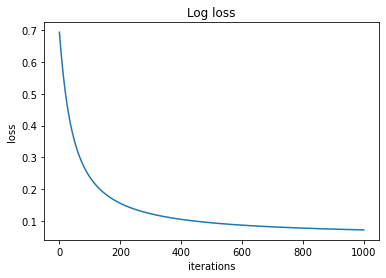

In [61]:
# как менялась при этом функция потерь
plt.title('Log loss')
plt.xlabel('iterations')
plt.ylabel('loss')
plt.plot(range(len(losses)), losses);

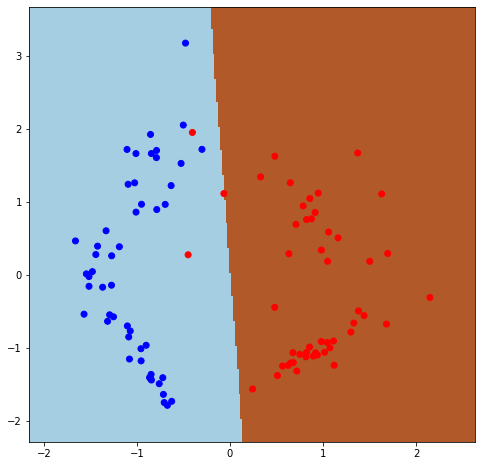

In [62]:
# Визуализация логистической регрессии
plt.figure(figsize=(8, 8))

x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
h = .02  # step size in the mesh
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = predict(w, np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

plt.scatter(X[:, 0], X[:, 1], c=y, cmap=colors);

3. Создайте функцию calc_pred_proba, возвращающую предсказанную вероятность класса 1 (на вход подаются W, который уже посчитан функцией eval_model и X, на выходе - массив y_pred_proba).


4. Создайте функцию calc_pred, возвращающую предсказанный класс (на вход подаются W, который уже посчитан функцией eval_model и X, на выходе - массив y_pred).

5. *Реализуйте функции для подсчета Accuracy, матрицы ошибок, точности и полноты, а также F1 score.

6. Могла ли модель переобучиться? Почему?